In [1]:
# 必要なライブラリをインポート
import pandas as pd
import numpy as np
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Selecting previously unselected package fonts-ipafont-gothic.
(Reading database ... 123597 files and directories currently installed.)
Preparing to unpack .../fonts-ipafont-gothic_00303-21ubuntu1_all.deb ...
Unpacking fonts-ipafont-gothic (00303-21ubuntu1) ...
Selecting previously unselected package fonts-ipafont-mincho.
Preparing to unpack .../fonts-ipafont-mincho_00303-21ubuntu1_all.deb ...
Unpacking fonts-ipafont-mincho (00303-21ubuntu1) ...
Setting up fonts-ipafont-mincho (00303-21ubuntu1) ...
update-alternatives: using /usr/share/fonts/opentype/ipafont-mincho/ipam.ttf to provide /usr/share/fonts/truetype/fonts-japanese-mincho.ttf (fonts-japanese-mincho.ttf) in auto mode
Setting up fonts-ipafont-gothic (00303-21ubuntu1) ...
update-alternatives: using /usr/share/fonts/opentype/ipafont-gothic/ipag.

Text(0.5, 1.0, '日本語を表示できるかテスト')

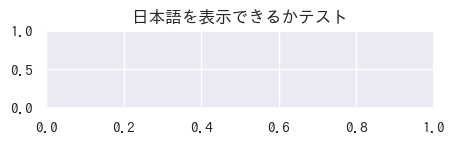

In [2]:
!apt-get update -qq
!apt-get install fonts-ipafont-gothic -qq

import matplotlib.pyplot as plt
from matplotlib import font_manager

# インストールしたフォントのパスを取得
font_path = '/usr/share/fonts/truetype/fonts-japanese-gothic.ttf'

# フォントを Matplotlib に追加
font_manager.fontManager.addfont(font_path)
plt.rcParams['font.family'] = 'IPAGothic'

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font='IPAGothic')

# 動作確認
plt.figure(figsize=(5,1))
plt.title('日本語を表示できるかテスト')

In [3]:
# Googleドライブをマウント
drive.mount('/content/drive')

Mounted at /content/drive


In [29]:
# Excelファイルのパスを指定
file_path = '/content/drive/MyDrive/分析対象データ'

# Excelファイルを読み込み、データフレームに格納
df = pd.read_excel(file_path + "/能力評価とCUBIC総合評価.xlsx")
df_cubic = pd.read_excel(file_path + "/cubicと人事評価.xlsx")

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 687 entries, 0 to 686
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   社員コード        687 non-null    int64 
 1   2022.9期能力評価  687 non-null    object
 2   2021.9期能力評価  687 non-null    object
 3   2020.9期能力評価  687 non-null    object
 4   CUBIC総合評価    572 non-null    object
dtypes: int64(1), object(4)
memory usage: 27.0+ KB


In [31]:
df["CUBIC総合評価"].unique()

array(['A', '－', nan, 'B-', 'C', 'B', 'D', 'S'], dtype=object)

In [32]:
# 評価基準の変換辞書
evaluation_dict = {
    'S': 5,
    'A': 4,
    'B': 3,
    'C': 2,
    'D': 1,
    '－':0
}

# 202x.9期能力評価カラムの変換
df['2022.9期能力評価'] = df['2022.9期能力評価'].map(evaluation_dict)
df['2021.9期能力評価'] = df['2021.9期能力評価'].map(evaluation_dict)
df['2020.9期能力評価'] = df['2020.9期能力評価'].map(evaluation_dict)

#平均能力評価を生成　3年分の平均
df['平均能力評価'] = df[['2022.9期能力評価', '2021.9期能力評価', '2020.9期能力評価']].mean(axis=1, skipna=True)

#要らないカラムを除去
df = df.drop(columns=['2020.9期能力評価', '2021.9期能力評価', '2022.9期能力評価'])

In [33]:
# 評価基準の変換辞書
cubic_dict = {
    'S': 6,
    'A': 5,
    'B': 4,
    'B-': 3,
    'C': 2,
    'D':1,
    '－': 0
}

# CUBIC総合評価カラムの変換
df['CUBIC総合評価'] = df['CUBIC総合評価'].map(cubic_dict)

In [34]:
# 抜き出したいカラムのリストを定義
columns_to_extract = [
    '社員コード', '思索型:内閉性', '自制型:弱気さ', '従順性', 'ﾓﾗﾄﾘｱﾑ傾向',
    '自己信頼性', '努力型:持続性', '積極性', '協調性', '共感性', "努力型:規則性"
]

# 新しいデータフレームを作成
df_reduced = df_cubic[columns_to_extract]

In [35]:
df_reduced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   社員コード     545 non-null    int64
 1   思索型:内閉性   545 non-null    int64
 2   自制型:弱気さ   545 non-null    int64
 3   従順性       545 non-null    int64
 4   ﾓﾗﾄﾘｱﾑ傾向  545 non-null    int64
 5   自己信頼性     545 non-null    int64
 6   努力型:持続性   545 non-null    int64
 7   積極性       545 non-null    int64
 8   協調性       545 non-null    int64
 9   共感性       545 non-null    int64
 10  努力型:規則性   545 non-null    int64
dtypes: int64(11)
memory usage: 47.0 KB


In [36]:
# 社員コードを基に結合
df_reduced = pd.merge(df, df_reduced[['社員コード', '思索型:内閉性', '自制型:弱気さ', '従順性', 'ﾓﾗﾄﾘｱﾑ傾向',
    '自己信頼性', '努力型:持続性', '積極性', '協調性', '共感性', "努力型:規則性"]], on='社員コード', how='left')

In [37]:
df_reduced = df_reduced.dropna(axis=0, how='any')

#要らないカラムを除去
df_reduced = df_reduced.drop(columns=['社員コード'])

In [38]:
df_reduced.info()

<class 'pandas.core.frame.DataFrame'>
Index: 470 entries, 0 to 686
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   CUBIC総合評価  470 non-null    float64
 1   平均能力評価     470 non-null    float64
 2   思索型:内閉性    470 non-null    float64
 3   自制型:弱気さ    470 non-null    float64
 4   従順性        470 non-null    float64
 5   ﾓﾗﾄﾘｱﾑ傾向   470 non-null    float64
 6   自己信頼性      470 non-null    float64
 7   努力型:持続性    470 non-null    float64
 8   積極性        470 non-null    float64
 9   協調性        470 non-null    float64
 10  共感性        470 non-null    float64
 11  努力型:規則性    470 non-null    float64
dtypes: float64(12)
memory usage: 47.7 KB


In [39]:
df_reduced.head(10)

,CUBIC総合評価,平均能力評価,思索型:内閉性,自制型:弱気さ,従順性,ﾓﾗﾄﾘｱﾑ傾向,自己信頼性,努力型:持続性,積極性,協調性,共感性,努力型:規則性
0,5.0,3.333333,51.0,42.0,52.0,44.0,56.0,59.0,57.0,52.0,47.0,51.0
3,3.0,4.000000,51.0,46.0,26.0,65.0,70.0,26.0,71.0,48.0,47.0,19.0
4,2.0,3.000000,71.0,59.0,46.0,51.0,31.0,42.0,43.0,44.0,36.0,44.0
5,4.0,3.000000,65.0,42.0,58.0,41.0,50.0,53.0,44.0,40.0,40.0,55.0
7,5.0,3.666667,48.0,33.0,46.0,36.0,59.0,33.0,50.0,52.0,40.0,32.0
9,5.0,3.000000,51.0,42.0,46.0,36.0,53.0,48.0,55.0,48.0,36.0,36.0
10,5.0,3.666667,45.0,59.0,46.0,51.0,53.0,50.0,57.0,56.0,52.0,44.0
11,3.0,3.000000,65.0,51.0,39.0,57.0,44.0,48.0,50.0,52.0,50.0,44.0
12,5.0,3.000000,54.0,37.0,50.0,47.0,70.0,50.0,49.0,40.0,36.0,55.0
13,3.0,3.000000,65.0,51.0,50.0,47.0,47.0,50.0,46.0,35.0,32.0,51.0


# 決定木モデルの作成

In [15]:
!pip install graphviz
!pip install pydotplus
!pip install dtreeviz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 3.6 MB/s eta 0:00:00


In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

In [42]:
# 特徴量とターゲットに分ける
X = df_reduced.drop('平均能力評価', axis=1)
y = df_reduced['平均能力評価']

# トレーニングセットとテストセットに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

# パラメータグリッドの設定
param_grid = {
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 3, 4, 5, 6, 7, 8, 9, 10],
    'min_samples_split': [2, 4, 6, 8, 10, 20],
    'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8]
}

# モデルのインスタンス化
model = DecisionTreeRegressor()

# グリッドサーチの設定
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

# グリッドサーチの実行
grid_search.fit(X_train, y_train)

# 最適なパラメータの表示
print("Best parameters found: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Fitting 5 folds for each of 3456 candidates, totalling 17280 fits
Best parameters found:  {'criterion': 'squared_error', 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2, 'splitter': 'random'}
Best score:  -0.1398071790021312


In [43]:
# 最適なパラメータでモデルの作成
best_model = grid_search.best_estimator_

# トレーニングデータに対するモデルの適合
best_model.fit(X_train, y_train)

#(criterion='friedman_mse', max_depth=3, min_samples_split=4, splitter='random')

DecisionTreeRegressor(max_depth=3, min_samples_leaf=4, min_samples_split=4,
                      splitter='random')

In [44]:
from sklearn.metrics import mean_absolute_error

# 予測
y_pred = best_model.predict(X_test)

# 評価
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Error (MAE): {mae}')

Mean Squared Error (MSE): 0.12162583331831095
Root Mean Squared Error (RMSE): 0.34874895457665667
Mean Absolute Error (MAE): 0.265379801675171


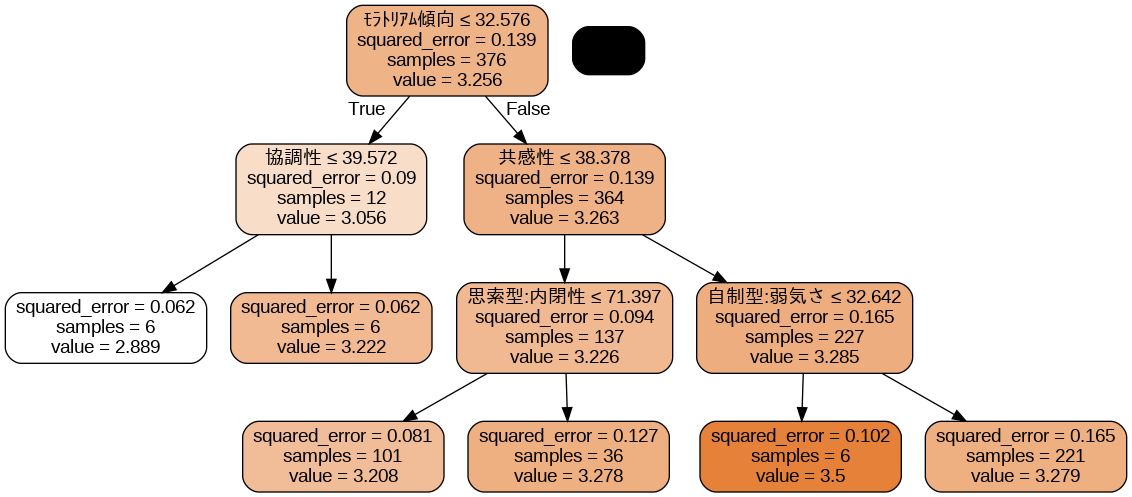

In [45]:
# 決定木をエクスポート
dot_data = export_graphviz(
    best_model,  # グリッドサーチ後の最適なモデルを使用
    out_file=None,
    feature_names=X_train.columns,
    filled=True,
    rounded=True,
    special_characters=True
)

# グラフを生成
graph = pydotplus.graph_from_dot_data(dot_data)

# グラフを表示
Image(graph.create_png())

In [46]:
from sklearn.metrics import mean_squared_error

# トレーニングデータに対する予測
train_pred = best_model.predict(X_train)
train_mse = mean_squared_error(y_train, train_pred)

# テストデータに対する予測
test_pred = best_model.predict(X_test)
test_mse = mean_squared_error(y_test, test_pred)

print(f'Training MSE: {train_mse}')
print(f'Testing MSE: {test_mse}')

Training MSE: 0.13445785566490281
Testing MSE: 0.12162583331831095


In [47]:
import joblib

# 決定木をエクスポート
joblib.dump(best_model, 'best_model.pkl')


"""
# モデルをインポート
import joblib

# 保存したモデルを読み込む
loaded_tree = joblib.load('best_decision_tree_model.pkl')
"""

"\n# モデルをインポート\nimport joblib\n\n# 保存したモデルを読み込む\nloaded_tree = joblib.load('best_decision_tree_model.pkl')\n"

**CUBIC総合評価を用いなかった場合**

In [48]:
# 列を削除
df_reduced = df_reduced.drop('CUBIC総合評価', axis=1)

# 特徴量とターゲットに分ける
X = df_reduced.drop('平均能力評価', axis=1)
y = df_reduced['平均能力評価']

# トレーニングセットとテストセットに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

In [54]:
df_reduced.info()

<class 'pandas.core.frame.DataFrame'>
Index: 470 entries, 0 to 686
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   平均能力評価    470 non-null    float64
 1   思索型:内閉性   470 non-null    float64
 2   自制型:弱気さ   470 non-null    float64
 3   従順性       470 non-null    float64
 4   ﾓﾗﾄﾘｱﾑ傾向  470 non-null    float64
 5   自己信頼性     470 non-null    float64
 6   努力型:持続性   470 non-null    float64
 7   積極性       470 non-null    float64
 8   協調性       470 non-null    float64
 9   共感性       470 non-null    float64
 10  努力型:規則性   470 non-null    float64
dtypes: float64(11)
memory usage: 44.1 KB


In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

# パラメータグリッドの設定
param_grid = {
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 3, 4, 5, 6, 7, 8, 9, 10],
    'min_samples_split': [2, 4, 6, 8, 10, 20],
    'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8]
}

# モデルのインスタンス化
model = DecisionTreeRegressor()

# グリッドサーチの設定
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

# グリッドサーチの実行
grid_search.fit(X_train, y_train)

# 最適なパラメータの表示
print("Best parameters found: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Fitting 5 folds for each of 3456 candidates, totalling 17280 fits
Best parameters found:  {'criterion': 'squared_error', 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 4, 'splitter': 'random'}
Best score:  -0.1380601583115161


In [49]:
# 最適なパラメータでモデルの作成
best_model = grid_search.best_estimator_

# トレーニングデータに対するモデルの適合
best_model.fit(X_train, y_train)

#(criterion='friedman_mse', max_depth=3, min_samples_split=4, splitter='random')

DecisionTreeRegressor(max_depth=3, min_samples_leaf=4, min_samples_split=4,
                      splitter='random')

In [50]:
from sklearn.metrics import mean_absolute_error

# 予測
y_pred = best_model.predict(X_test)

# 評価
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Error (MAE): {mae}')

Mean Squared Error (MSE): 0.1374406737849714
Root Mean Squared Error (RMSE): 0.3707299202721186
Mean Absolute Error (MAE): 0.2884453417195288


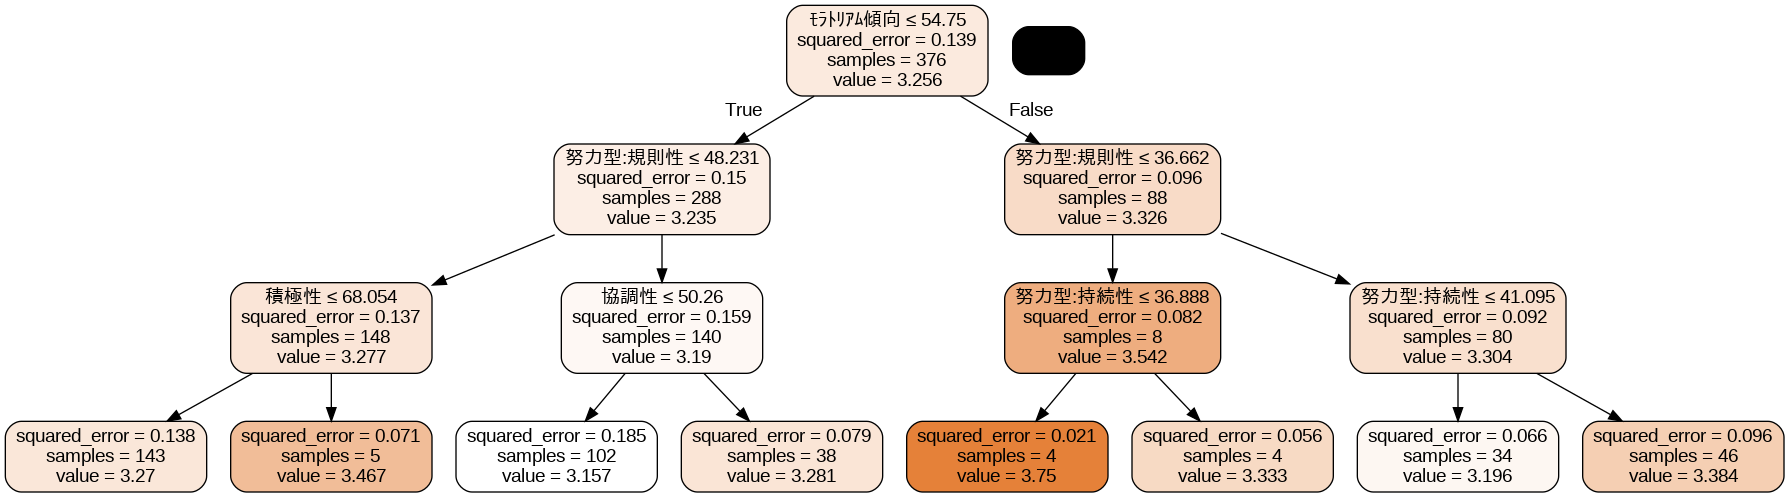

In [51]:
# 決定木をエクスポート
dot_data = export_graphviz(
    best_model,  # グリッドサーチ後の最適なモデルを使用
    out_file=None,
    feature_names=X_train.columns,
    filled=True,
    rounded=True,
    special_characters=True
)

# グラフを生成
graph = pydotplus.graph_from_dot_data(dot_data)

# グラフを表示
Image(graph.create_png())

In [52]:
from sklearn.metrics import mean_squared_error

# トレーニングデータに対する予測
train_pred = best_model.predict(X_train)
train_mse = mean_squared_error(y_train, train_pred)

# テストデータに対する予測
test_pred = best_model.predict(X_test)
test_mse = mean_squared_error(y_test, test_pred)

print(f'Training MSE: {train_mse}')
print(f'Testing MSE: {test_mse}')

Training MSE: 0.13016742639281037
Testing MSE: 0.1374406737849714


In [53]:
import joblib

# 決定木をエクスポート
joblib.dump(best_model, 'best_model_without_CUBIC.pkl')

['best_model_without_CUBIC.pkl']

**ランダムフォレスト**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# ランダムフォレストモデルの訓練
best_model = RandomForestRegressor(random_state=1234)
best_model.fit(X_train, y_train)

# 予測
y_pred = best_model.predict(X_test)

# 評価
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Error (MAE): {mae}')

Mean Squared Error (MSE): 0.13285992907801425
Root Mean Squared Error (RMSE): 0.3644995597775315
Mean Absolute Error (MAE): 0.2700354609929079


In [ ]:
import numpy as np

# NumPy配列に変換して特徴量名を削除
X_test_array = X_test.to_numpy()

# 各決定木のMSEまたはMAEを計算する
best_tree_index = -1
best_mse = float('inf')

# テストセットで各決定木を評価
for i, tree in enumerate(best_model.estimators_):
    y_pred_tree = tree.predict(X_test_array)  # NumPy配列を使用
    mse_tree = mean_squared_error(y_test, y_pred_tree)

    # MSEが小さい方の決定木を選択
    if mse_tree < best_mse:
        best_mse = mse_tree
        best_tree_index = i

print(f'Best Decision Tree Index: {best_tree_index}, MSE: {best_mse}')

# 最良の決定木を取得
best_tree = best_model.estimators_[best_tree_index]

# 決定木をエクスポート
dot_data = export_graphviz(
    best_tree,
    out_file=None,
    feature_names=X_train.columns,  # フィーチャー名を使用
    filled=True,
    rounded=True,
    special_characters=True
)

# グラフを生成
graph = pydotplus.graph_from_dot_data(dot_data)

# グラフを表示
Image(graph.create_png())


Output hidden; open in https://colab.research.google.com to view.